In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D,
MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [7]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [15]:
autoencoder = Sequential()

# 인코딩
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28,1),
                       activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))                       
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_24 (Conv2D)          (None, 4, 4, 8)          

In [12]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 85s 179ms/step - loss: 0.2067 - val_loss: 0.1379
Epoch 2/50
469/469 [==============================] - 83s 178ms/step - loss: 0.1278 - val_loss: 0.1195
Epoch 3/50
469/469 [==============================] - 84s 178ms/step - loss: 0.1161 - val_loss: 0.1115
Epoch 4/50
469/469 [==============================] - 85s 180ms/step - loss: 0.1102 - val_loss: 0.1068
Epoch 5/50
469/469 [==============================] - 83s 177ms/step - loss: 0.1059 - val_loss: 0.1030
Epoch 6/50
469/469 [==============================] - 83s 177ms/step - loss: 0.1027 - val_loss: 0.1003
Epoch 7/50
469/469 [==============================] - 84s 179ms/step - loss: 0.1001 - val_loss: 0.0978
Epoch 8/50
469/469 [==============================] - 84s 180ms/step - loss: 0.0976 - val_loss: 0.0955
Epoch 9/50
469/469 [==============================] - 84s 180ms/step - loss: 0.0956 - val_loss: 0.0936
Epoch 10/50
469/469 [==============================] - 84s 180ms/step - l

313/313 [==============================] - 1s 3ms/step


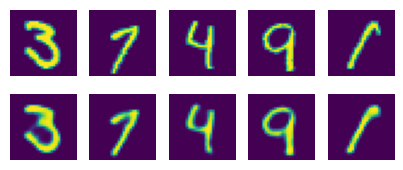

In [13]:
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()